# Loading `gwent` SNR Outputs to Generate Comparison Waterfall Plots

Here we present a tutorial on how to use `gwent` output from `Get_SNR_Matrix` to simultaneously plot Mass vs. Redshift SNRs for the instrument models currently implemented (LISA, PTAs, aLIGO, and Einstein Telescope) with the signal being an coalescing Binary Black Holes.

First, we import the necessary packages.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as colors

import astropy.units as u
from astropy.cosmology import z_at_value
from astropy.cosmology import WMAP9 as cosmo

import os,sys
gwent_path = '/Users/andrewkaiser/Documents/GradSchool/Research/gwent'
load_directory = gwent_path + '/LoadFiles/'

sys.path.insert(0,gwent_path)
import gwent
from gwent import binary
from gwent import detector
from gwent import snr
from gwent import snrplot

Setting matplotlib preferences

In [61]:
mpl.rcParams['figure.dpi'] = 300
mpl.rcParams['figure.figsize'] = [5,3]
mpl.rcParams['text.usetex'] = True
mpl.rc('font',**{'family':'serif','serif':['Times New Roman']})

We need to get the file directories to load in the SNRs.

In [53]:
load_directory = gwent.__path__[0] + '/LoadFiles/InstrumentFiles/'
save_directory = '/Users/andrewkaiser/Documents/GradSchool/Research/LisaParameterization/DetectorDesignSensitivities/Figures/'

## Loading SNR Data Files

In [5]:
#Variable on y-axis
var_y = 'z'
#Number of SNRMatrix rows
sampleRate_y = 75
#Variable on x-axis
var_x = 'M'
#Number of SNRMatrix columns
sampleRate_x = 75

In [6]:
def Get_Source(model):
    if model in [0,1]:
        #M = m1+m2 Total Mass
        M = 1e2
        M_min = 1e0
        M_max = 1e5
    elif model in [2,3]:
        #M = m1+m2 Total Mass
        M = 1e8
        M_min = 1e7
        M_max = 1e11
    else:
        #M = m1+m2 Total Mass
        M = 1e6
        M_min = 1e1
        M_max = 1e10
        
    #q = m2/m1 reduced mass
    q = 1.0
    q_min = 1.0
    q_max = 18.0

    #Chi = S_i*L/m_i**2, spins of each mass i
    chi1 = 0.0 #spin of m1
    chi2 = 0.0 #spin of m2
    chi_min = -0.85 #Limits of PhenomD for unaligned spins
    chi_max = 0.85
    
    z = 3.0 #Redshift
    z_min = 1e-2
    z_max = 1e3
    
    source = binary.BBHFrequencyDomain(M,q,z,chi1,chi2)
    source.M = [M,M_min,M_max]
    source.q = [q,q_min,q_max]
    source.chi1 = [chi1,chi_min,chi_max]
    source.chi2 = [chi2,chi_min,chi_max]
    source.z = [z,z_min,z_max]

    return source

#### LISA Proposal 1

SNR values from the ESA L3 proposal run.

In [7]:
#L3 proposal
#Default Params from https://arxiv.org/abs/1702.00786
T_obs = 4*u.yr #Observing time in years
L = 2.5e9*u.m #armlength in meters
A_acc = 3e-15*u.m/u.s/u.s
f_acc_break_low = .4*u.mHz.to('Hz')*u.Hz
f_acc_break_high = 8.*u.mHz.to('Hz')*u.Hz
f_IMS_break = 2.*u.mHz.to('Hz')*u.Hz
A_IMS = 10e-12*u.m
Background = False
T_type = 'N'

LISA_prop1 = detector.SpaceBased('LISA_ESA',\
                               T_obs,L,A_acc,f_acc_break_low,f_acc_break_high,A_IMS,f_IMS_break,\
                               Background=Background,T_type=T_type)
source_1 = Get_Source(4)

Load SNR from file

In [8]:
[lisa_sample_x,lisa_sample_y,lisa_SNR] = snr.Get_SNR_Matrix(source_1,LISA_prop1,var_x,sampleRate_x,var_y,sampleRate_y)

First column is x-axis variable, second is y-axis variable
z and M sample space corresponding to SNR height

In [9]:
lisa_Samples = [lisa_sample_x,lisa_sample_y]

Take log of variables and SNR for plotting

In [10]:
lisa_logSamples = np.log10(lisa_Samples)
lisa_logSNR = np.log10(lisa_SNR)

#### Einstein Telescope

SNR values from the Einstein Telescope proposal run.

In [11]:
#Einstein Telescope
ET_filedirectory = load_directory + '/EinsteinTelescope/StrainFiles/'
ET_filename = 'ET_D_data.txt'
ET_filelocation = ET_filedirectory + ET_filename
T_obs = 4*u.yr #Observing time in years
ET = detector.GroundBased('ET',T_obs,load_location=ET_filelocation,I_type='A')
source_2 = Get_Source(0)

In [12]:
[et_sample_x,et_sample_y,et_SNR] = snr.Get_SNR_Matrix(source_2,ET,var_x,sampleRate_x,var_y,sampleRate_y)

In [13]:
et_Samples = [et_sample_x,et_sample_y]
et_logSamples = np.log10(et_Samples)
et_logSNR = np.log10(et_SNR)

#### aLIGO

SNR values from the Advanced LIGO run.

In [14]:
#aLIGO
aLIGO_filedirectory = load_directory + '/aLIGO/StrainFiles/'
aLIGO_filename = 'aLIGODesign.txt'
aLIGO_filelocation = aLIGO_filedirectory + aLIGO_filename
T_obs = 4*u.yr #Observing time in years
aLIGO = detector.GroundBased('aLIGO',T_obs,load_location=aLIGO_filelocation,I_type='A')
source_3 = Get_Source(1)

In [15]:
[aLIGO_sample_x,aLIGO_sample_y,aLIGO_SNR] = snr.Get_SNR_Matrix(source_3,aLIGO,var_x,sampleRate_x,var_y,sampleRate_y)

In [16]:
aLIGO_Samples = [aLIGO_sample_x,aLIGO_sample_y]
aLIGO_logSNR = np.log10(aLIGO_SNR)
aLIGO_logSamples = np.log10(aLIGO_Samples)

#### NANOGrav

SNR values from the NANOGrav-esque run.

In [17]:
#NANOGrav calculation using 11.5yr parameters https://arxiv.org/abs/1801.01837
load_name = 'NANOGrav_11yr_S_eff.txt'
load_location = load_directory + '/NANOGrav/StrainFiles/' + load_name
T_obs = 11.42*u.yr #Observing time in years
nanograv = detector.PTA('NANOGrav 11yr',T_obs,load_location=load_location,I_type='E')
source_4 = Get_Source(2)

In [18]:
[nanograv_sample_x,nanograv_sample_y,nanograv_SNR] = snr.Get_SNR_Matrix(source_4,nanograv,var_x,sampleRate_x,var_y,sampleRate_y)

In [19]:
nanograv_Samples = [nanograv_sample_x,nanograv_sample_y]
nanograv_logSamples = np.log10(nanograv_Samples)
nanograv_logSNR = np.log10(nanograv_SNR)

#### SKA

SNR values from the SKA-esque run.

In [20]:
#SKA calculation using parameters and methods from https://arxiv.org/abs/0804.4476 section 7.1
T_obs = 15*u.yr #Observing time (years)
sigma = 10*u.ns.to('s')*u.s #rms timing residuals in nanoseconds
N_p = 20 #Number of pulsars
cadence = 1/(u.wk.to('yr')*u.yr) #Avg observation cadence of 1 every week in num/year

SKA = detector.PTA('SKA',T_obs,N_p,sigma,cadence)
source_5 = Get_Source(3)

In [21]:
[SKA_sample_x,SKA_sample_y,SKA_SNR] = snr.Get_SNR_Matrix(source_5,SKA,var_x,sampleRate_x,var_y,sampleRate_y)

In [22]:
SKA_Samples = [SKA_sample_x,SKA_sample_y]
SKA_logSamples = np.log10(SKA_Samples)
SKA_logSNR = np.log10(SKA_SNR)

## Make Waterfall Plots

Sets plotting parameters

In [23]:
contourcolorPresent = 'plasma'
transparencyPresent = 1.0
contourcolorFuture = 'plasma'
transparencyFuture = 0.6
axissize = 8
labelsize = 10
textsize = 10
textcolor1 = 'k'
textcolor2 = 'w'
linesize = 2

Selects contour levels to separate sections into

In [24]:
contLevels = np.array([5, 10, 1e2, 1e3, 1e4, 1e5, 1e6, 1e7])
logLevels = np.log10(contLevels)

Set labels for x and y axes

In [25]:
Mlabel_min = 0
Mlabel_max = 11
zlabel_min = -2.0
zlabel_max = 3.0
zlabels = np.logspace(zlabel_min,zlabel_max,zlabel_max-zlabel_min+1)
Mlabels = np.logspace(Mlabel_min,Mlabel_max,Mlabel_max-Mlabel_min+1)

Set labels for lookback time on y-axis

In [109]:
lb_time_axis = True

ages1 = np.array([13.5,13,10,5,1])*u.Gyr 
ages2 = np.array([500,100,10,1])*u.Myr
ages2 = ages2.to('Gyr')
ages = np.hstack((ages1.value,ages2.value))
ages = ages*u.Gyr
ageticks = [z_at_value(cosmo.age,age) for age in ages]

Set labels for luminosity distance on y-axis

In [119]:
dl_axis = False

dists = np.array([1e4,1e3,1e2,10,1,.1,1e-2])*u.Gpc
distticks = [z_at_value(cosmo.luminosity_distance,dist) for dist in dists]

Add Label positions and labels for different GW detectors

In [120]:
labelaLIGO_text = 'aLIGO\n(2016)'
labelaLIGO_xpos = 0.22
labelaLIGO_ypos = 0.125

labelnanograv_text = 'NANOGrav\n(2018)'
labelnanograv_xpos = 0.93
labelnanograv_ypos = 0.19

labelet_text = 'ET\n($\sim$2030s)'
labelet_xpos = 0.175
labelet_ypos = 0.6

labelLisa_text = 'LISA\n($\sim$2030s)'
labelLisa_xpos = 0.615
labelLisa_ypos = 0.1

labelIpta_text = 'IPTA\n($\sim$2030s)'
labelIpta_xpos = 0.87
labelIpta_ypos = 0.6

#### Plots of Entire GW Band

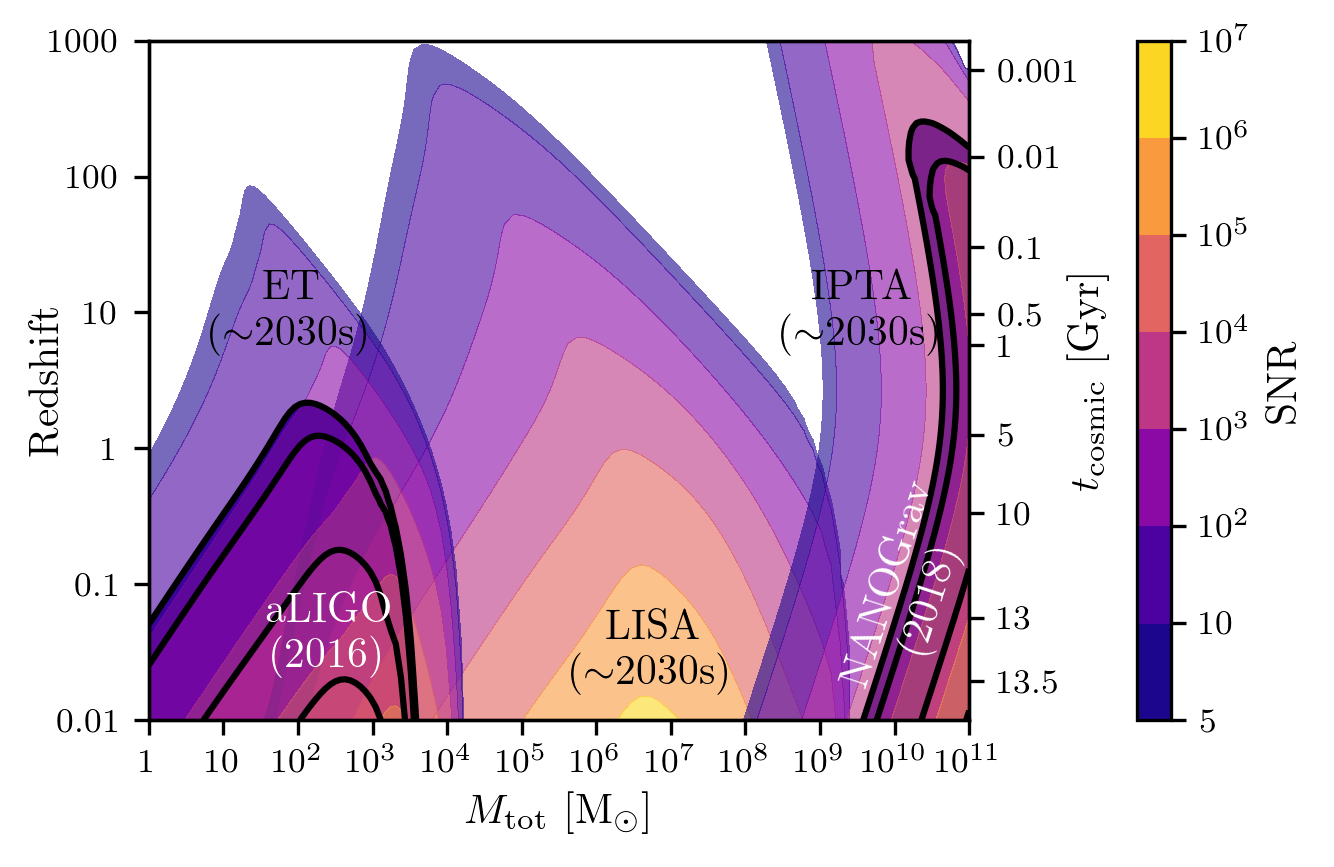

In [121]:
fig, ax1 = plt.subplots()

CS1 = ax1.contourf(nanograv_logSamples[0],nanograv_logSamples[1],nanograv_logSNR,logLevels,\
                   cmap = contourcolorPresent, alpha = transparencyPresent)

ax1.contourf(aLIGO_logSamples[0],aLIGO_logSamples[1],aLIGO_logSNR,logLevels,\
             cmap = contourcolorPresent, alpha = transparencyPresent)

ax1.contour(aLIGO_logSamples[0],aLIGO_logSamples[1],aLIGO_logSNR,logLevels,colors = 'k')

ax1.contourf(lisa_logSamples[0],lisa_logSamples[1],lisa_logSNR,logLevels,\
             cmap=contourcolorFuture, alpha = transparencyFuture)

ax1.contourf(et_logSamples[0],et_logSamples[1],et_logSNR,logLevels,\
             cmap = contourcolorFuture, alpha = transparencyFuture)

ax1.contourf(SKA_logSamples[0],SKA_logSamples[1],SKA_logSNR,logLevels,\
             cmap = contourcolorFuture, alpha = transparencyFuture)

#If true, display luminosity distance on right side of plot
if dl_axis:
    #Set other side y-axis for luminosity distance scalings
    ax2 = ax1.twinx()
    ax2.contour(nanograv_logSamples[0],nanograv_logSamples[1],nanograv_logSNR,logLevels,colors = 'k')

    ax2.set_yticks(np.log10(distticks))
    ax2.set_xlim(et_logSamples[0][0],11)
    ax2.set_ylim(SKA_logSamples[1][0],SKA_logSamples[1][-1])
    ax2.set_yticklabels([r'$10^{%i}$' %np.log10(dist) if np.abs(int(np.log10(dist))) > 1 else '{:g}'.format(dist) for dist in dists.value],fontsize = axissize)
    ax2.set_ylabel(r'$D_{L}$ [Gpc]',fontsize=labelsize)
    ax2.yaxis.set_label_coords(1.125,.5)
    #Make colorbar
    cbar = fig.colorbar(CS1,ax=(ax1,ax2),pad=0.01)
elif lb_time_axis:
    #Set other side y-axis for lookback time scalings
    ax2 = ax1.twinx()
    ax2.contour(nanograv_logSamples[0],nanograv_logSamples[1],nanograv_logSNR,logLevels,colors = 'k')
    #Set axes limits 
    ax2.set_yticks(np.log10(ageticks))
    ax2.set_yticklabels(['{:g}'.format(age) for age in ages.value],fontsize = axissize)
    ax2.set_ylabel(r'$t_{\rm cosmic}$ [Gyr]',fontsize=labelsize)
    ax2.yaxis.set_label_coords(1.125,.5)
    #Make colorbar
    cbar = fig.colorbar(CS1,ax=(ax1,ax2),pad=0.01)
else:
    ax1.contour(nanograv_logSamples[0],nanograv_logSamples[1],nanograv_logSNR,logLevels,colors = 'k')
    #Make colorbar
    cbar = fig.colorbar(CS1,pad=0.01)
    
#Set axes limits 
ax1.set_xlim(et_logSamples[0][0],11)
ax1.set_ylim(SKA_logSamples[1][0],SKA_logSamples[1][-1])


#Set ticks and labels
ax1.set_yticks(np.log10(zlabels))
ax1.set_xticks(np.log10(Mlabels))
ax1.set_xticklabels([r'$10^{%i}$' %y if int(y) > 1 else r'$%i$' %(10**y) for y in np.log10(Mlabels)],\
    fontsize = axissize)
ax1.set_yticklabels([x if int(x) < 1 else int(x) for x in zlabels],\
    fontsize = axissize)

ax1.set_xlabel(r'$M_{\rm tot}$ $[\mathrm{M}_{\odot}]$',fontsize = labelsize)
ax1.set_ylabel(r'$\mathrm{Redshift}$',fontsize = labelsize)
ax1.yaxis.set_label_coords(-.1,.5)

#Label different GW detectors
plt.text(labelaLIGO_xpos,labelaLIGO_ypos,labelaLIGO_text,fontsize = textsize, \
         horizontalalignment='center',verticalalignment='center', color = textcolor2,transform = ax1.transAxes)

plt.text(labelnanograv_xpos,labelnanograv_ypos,labelnanograv_text,fontsize = textsize,\
         horizontalalignment='center',verticalalignment='center', color = textcolor2,transform = ax1.transAxes,\
        rotation=72)

plt.text(labelet_xpos,labelet_ypos,labelet_text,fontsize = textsize,\
         horizontalalignment='center',verticalalignment='center', color = textcolor1,transform = ax1.transAxes)

plt.text(labelLisa_xpos,labelLisa_ypos,labelLisa_text,fontsize = textsize,\
         horizontalalignment='center',verticalalignment='center', color = textcolor1,transform = ax1.transAxes)

plt.text(labelIpta_xpos,labelIpta_ypos,labelIpta_text,fontsize = textsize,\
         horizontalalignment='center',verticalalignment='center', color = textcolor1,transform = ax1.transAxes)

cbar.set_label(r'$\mathrm{SNR}$',fontsize = labelsize)
cbar.ax.tick_params(labelsize = axissize)
cbar.ax.set_yticklabels([r'$10^{%i}$' %x if int(x) > 1 else r'$%i$' %(10**x) for x in logLevels])
plt.show()
#fig.savefig(save_directory+'full_detector_GW_spectrum_dl.png',bbox_inches='tight')